In [2]:
import numpy as np
import pandas as pd
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [10]:
df=pd.read_csv('baseball.csv')

In [11]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [12]:
#Lets rename the columns to understand better.

In [13]:
columns = ['W','Runs', 'AtBats', 'Hits', 'Doubles', 'Triples', 'Homeruns','Walks','Strikeouts','StolenBases','RunsAllowed','EarnedRuns','ERA','Completegame','Shutouts','Saves','Errors']

In [14]:
df=pd.read_csv('baseball.csv',names=columns,header=0)

In [15]:
df

,W,Runs,AtBats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,StolenBases,RunsAllowed,EarnedRuns,ERA,Completegame,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [16]:
df.shape

(30, 17)

In [17]:
#Let's check the datatypes of the columns
df.dtypes

W                 int64
Runs              int64
AtBats            int64
Hits              int64
Doubles           int64
Triples           int64
Homeruns          int64
Walks             int64
Strikeouts        int64
StolenBases       int64
RunsAllowed       int64
EarnedRuns        int64
ERA             float64
Completegame      int64
Shutouts          int64
Saves             int64
Errors            int64
dtype: object

In [18]:
#Lets check the null values
df.isnull().sum()

W               0
Runs            0
AtBats          0
Hits            0
Doubles         0
Triples         0
Homeruns        0
Walks           0
Strikeouts      0
StolenBases     0
RunsAllowed     0
EarnedRuns      0
ERA             0
Completegame    0
Shutouts        0
Saves           0
Errors          0
dtype: int64

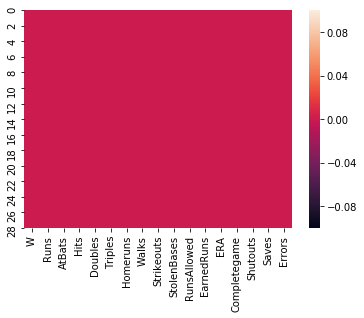

In [19]:
sns.heatmap(df.isnull())

In [20]:
#Summary Statistics
df.describe()

,W,Runs,AtBats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,StolenBases,RunsAllowed,EarnedRuns,ERA,Completegame,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [21]:
#Let's check the correlation matrix
dfcor = df.corr()
dfcor

,W,Runs,AtBats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,StolenBases,RunsAllowed,EarnedRuns,ERA,Completegame,Shutouts,Saves,Errors
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AtBats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Homeruns,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Walks,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strikeouts,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
StolenBases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


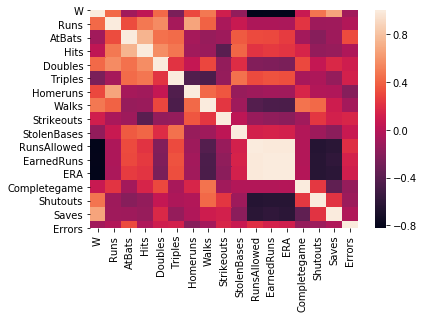

In [22]:
#Checking correlation with the help of heatmap.
sns.heatmap(dfcor)

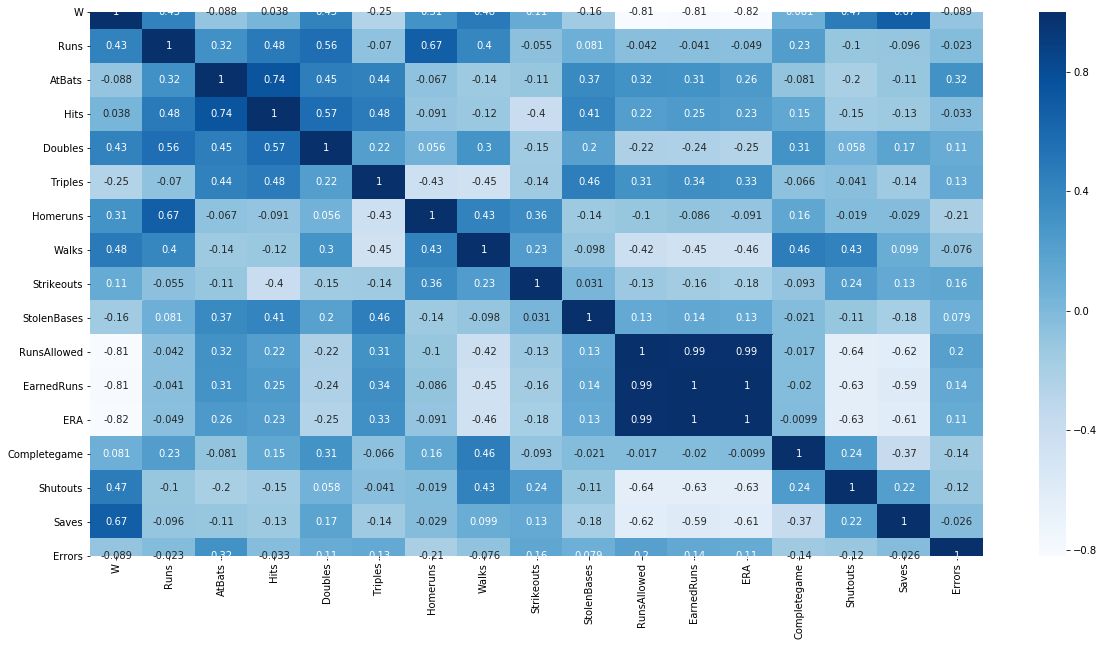

In [23]:
plt.figure(figsize = (20,10))
sns.heatmap(dfcor,cmap = 'Blues',annot = True)

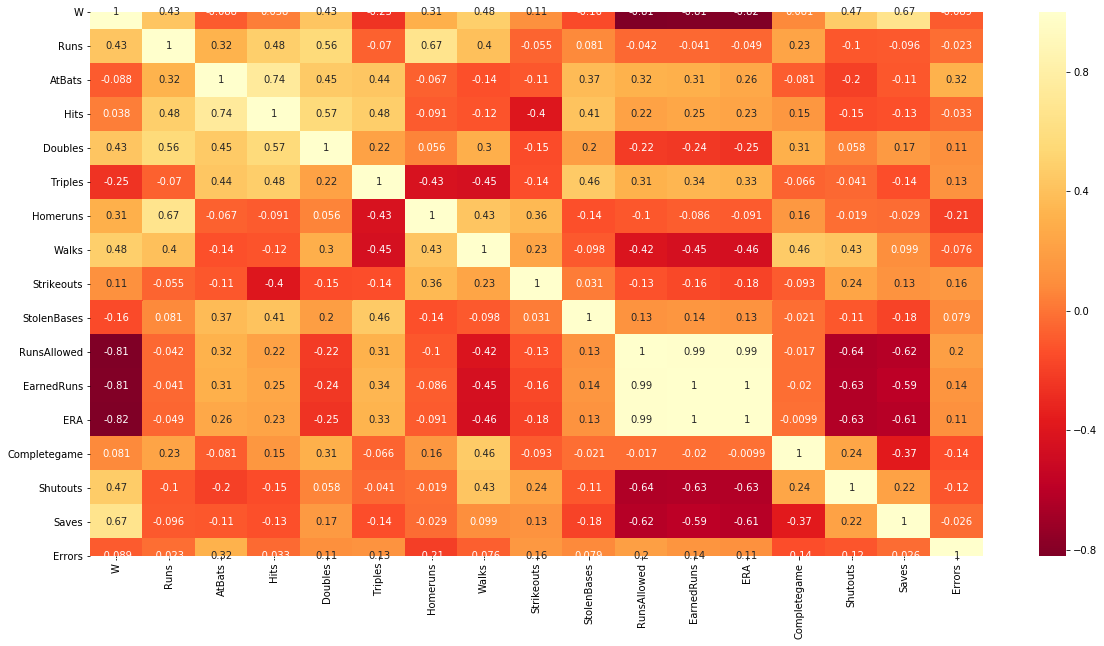

In [24]:
plt.figure(figsize = (20,10))
sns.heatmap(dfcor,cmap ='YlOrRd_r',annot = True)

In [25]:
df.drop('RunsAllowed',axis=1,inplace=True)
df.drop('EarnedRuns',axis=1,inplace=True)
df.drop('ERA',axis=1,inplace=True)

In [26]:
df.shape

(30, 14)

In [27]:
#Letscheck the skewness of the dataset
df.skew()

W               0.047089
Runs            1.200786
AtBats          0.183437
Hits            0.670254
Doubles        -0.230650
Triples         0.129502
Homeruns        0.516441
Walks           0.158498
Strikeouts     -0.156065
StolenBases     0.479893
Completegame    0.736845
Shutouts        0.565790
Saves           0.657524
Errors          0.890132
dtype: float64

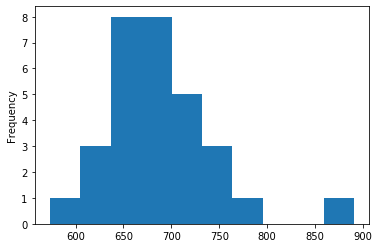

In [28]:
df['Runs'].plot.hist()

In [29]:
#Treating using Log
import numpy as np
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [30]:
#lets again check the skewness
df.skew()

W               0.047089
Runs            0.744813
AtBats          0.183437
Hits            0.628584
Doubles        -0.230650
Triples         0.129502
Homeruns        0.516441
Walks           0.158498
Strikeouts     -0.156065
StolenBases     0.479893
Completegame   -0.325962
Shutouts       -0.589640
Saves           0.163057
Errors          0.632916
dtype: float64

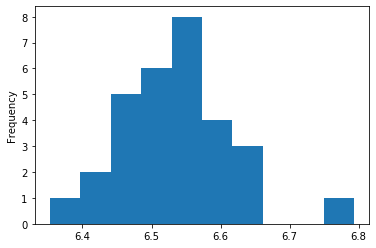

In [31]:
df['Runs'].plot.hist()

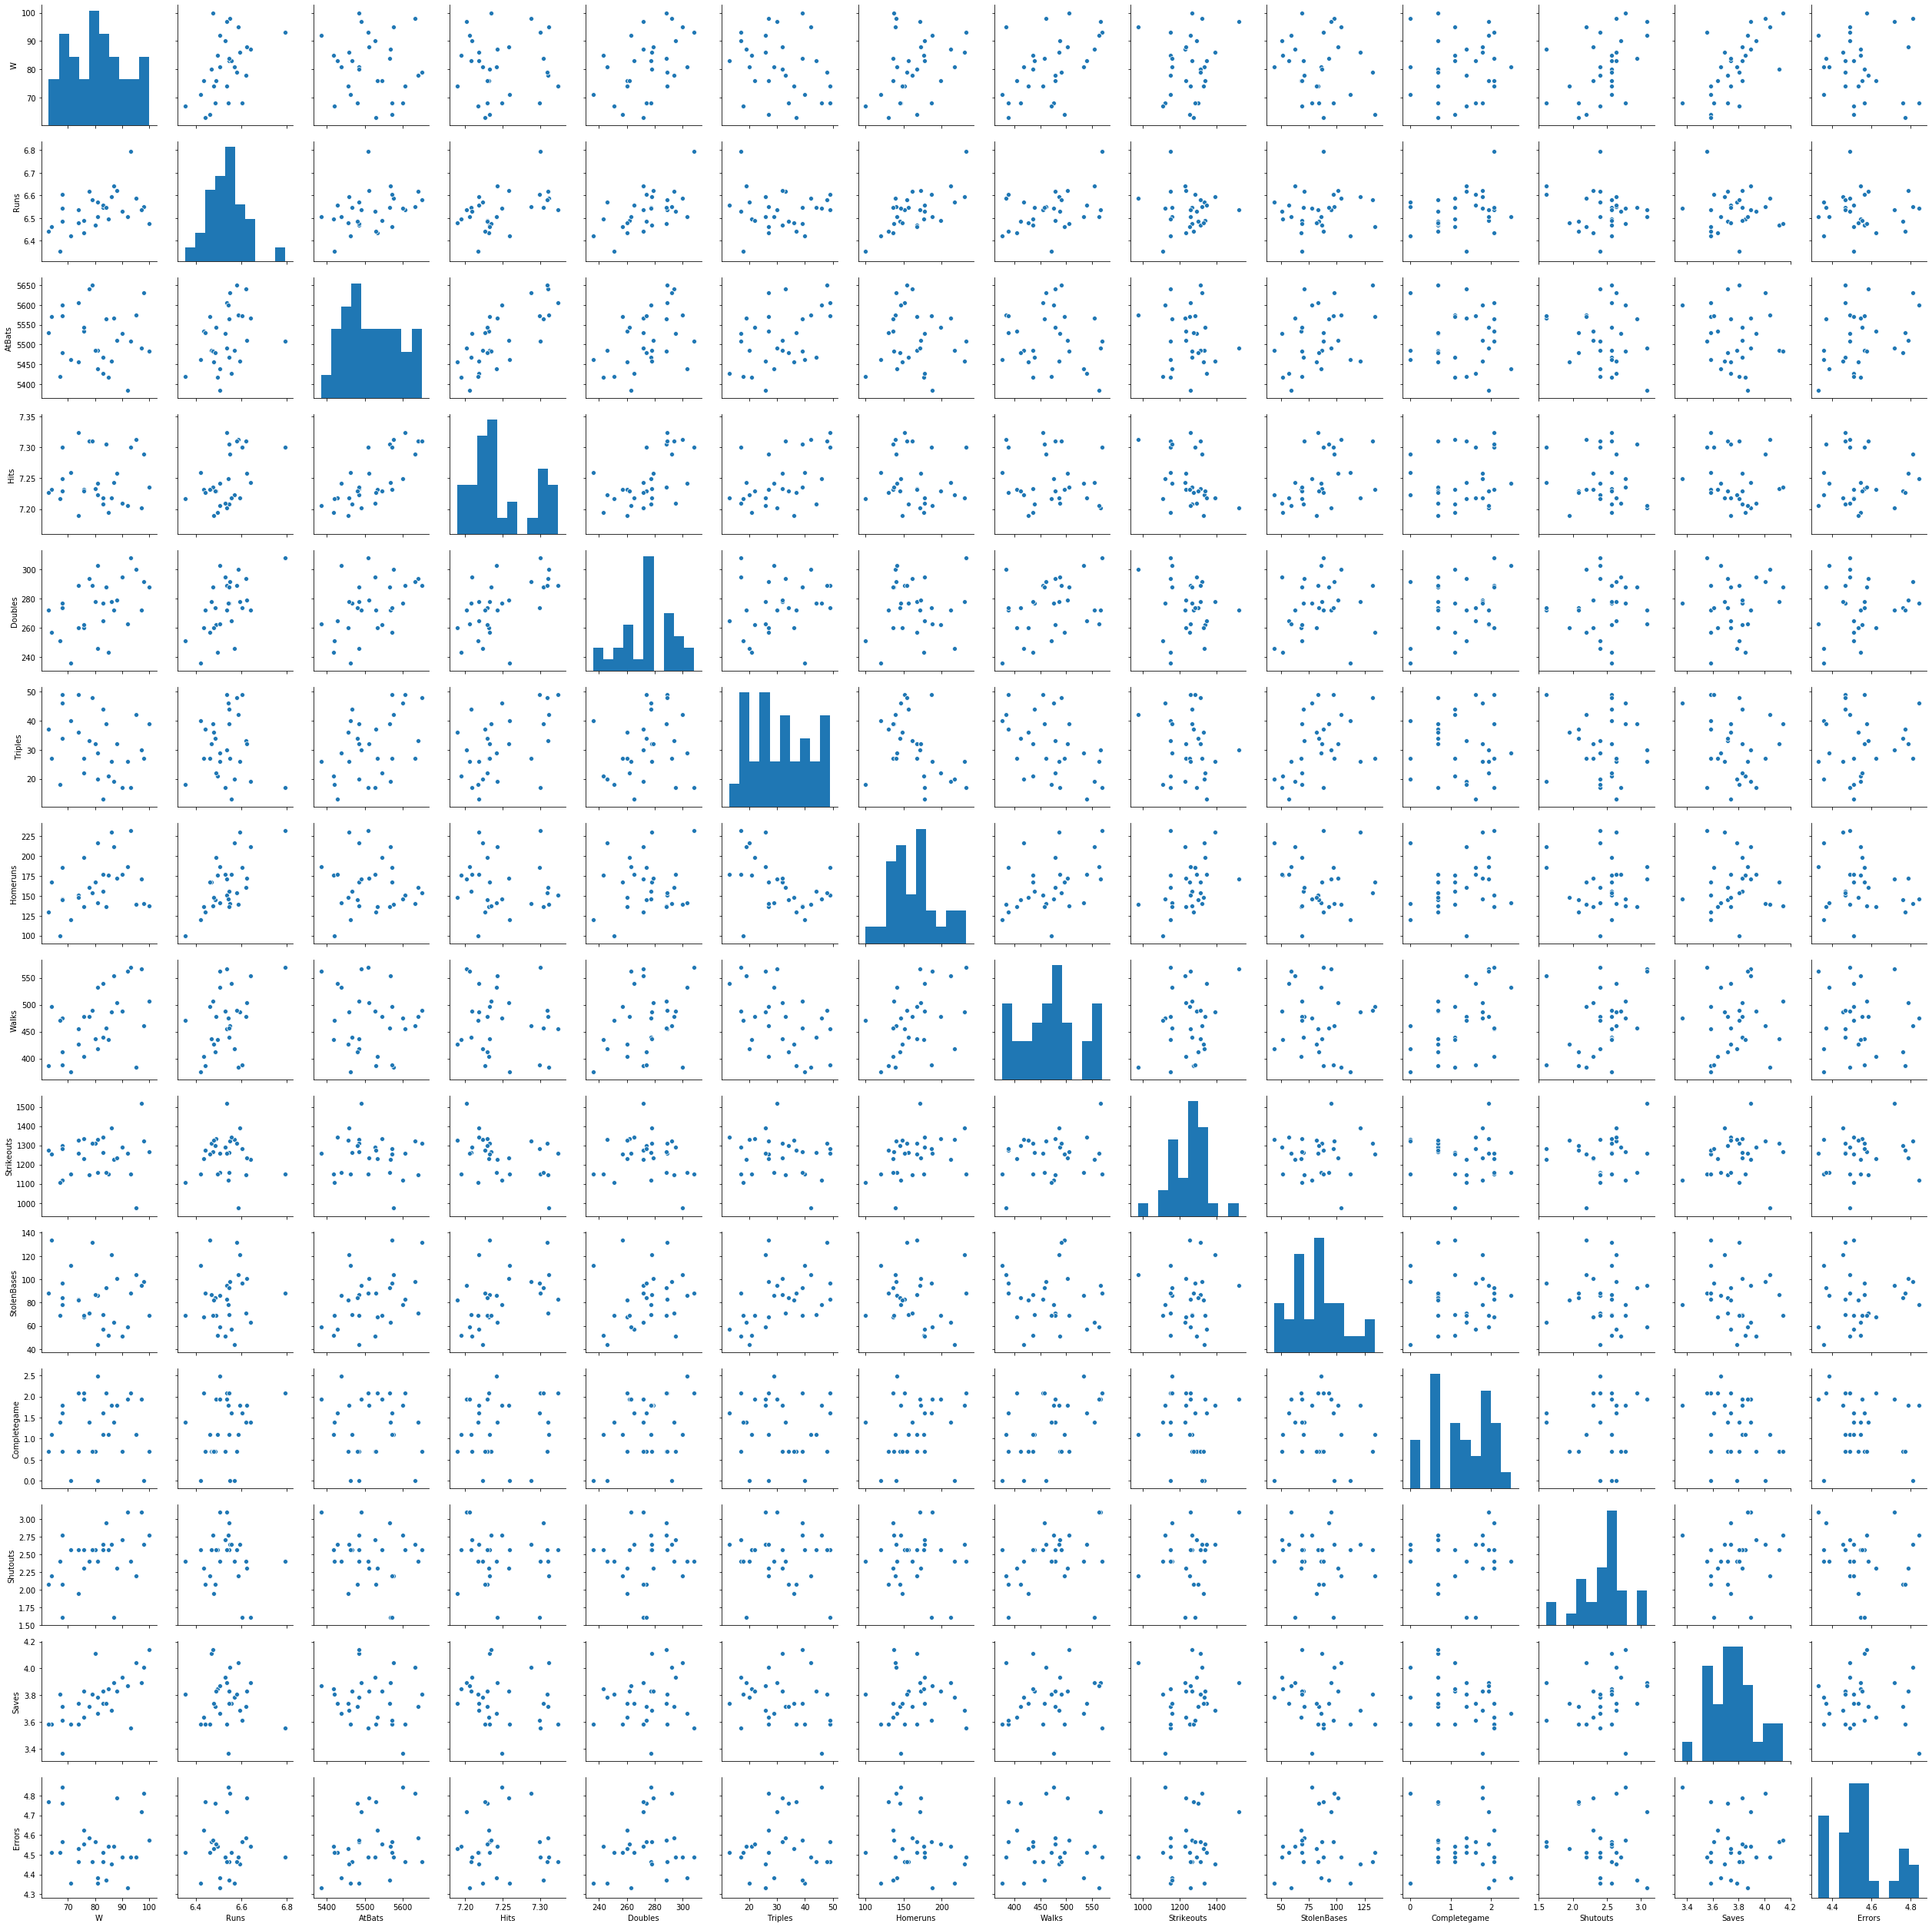

In [32]:
#Lets check pairplot using seaborn library
import seaborn as sns
sns.pairplot(df)
plt.show()

In [33]:
collist=df.columns.values
ncol=15
nrows=15

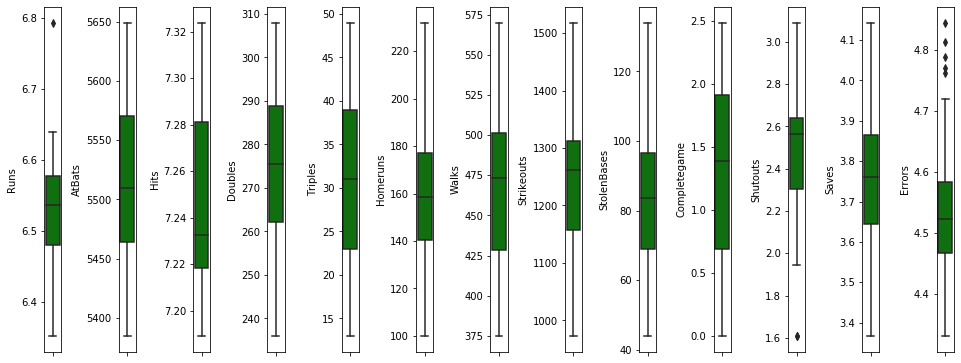

In [34]:
#Lets visualize outliers through boxplots
plt.figure(figsize=(ncol,5*ncol))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

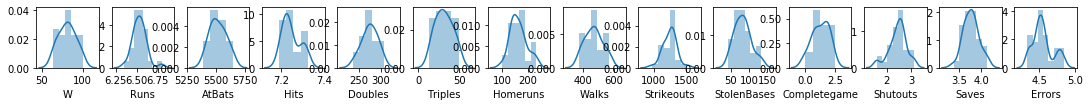

In [35]:
plt.figure(figsize=(20,20))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [36]:
#Now treating the outliers
from scipy.stats import zscore
z = np.abs(zscore(df))
z

array([[1.3654086 , 0.66532946, 0.84773126, 1.64938177, 1.42017307,
        1.04119304, 0.7872986 , 1.53490242, 2.69762957, 0.91388329,
        0.27892148, 0.72910756, 1.58127344, 0.42706021],
       [0.1978383 , 0.17956168, 0.71109353, 0.98165584, 0.12740339,
        1.23580856, 0.24396668, 0.5365919 , 0.15487844, 0.60182558,
        0.27892148, 0.32263825, 0.336185  , 0.59169263],
       [0.00324325, 0.30770406, 1.1152333 , 0.13421019, 1.58879521,
        0.22380785, 0.7233772 , 1.13914361, 0.89398189, 0.11144918,
        1.76277761, 0.15516048, 0.62244106, 1.19928939],
       [0.48324437, 1.20472969, 0.24152162, 0.38913576, 0.82812203,
        0.41842337, 0.8831807 , 1.16053598, 0.16860185, 0.69098493,
        1.16561891, 0.42776132, 0.77328196, 0.56049482],
       [0.67783942, 0.05507026, 1.28073815, 1.95148012, 0.80189192,
        1.72234737, 0.40377019, 0.25136033, 0.10586628, 0.02228984,
        1.16561891, 0.32263825, 1.08725291, 0.59169263],
       [1.17081355, 3.22198296, 0.1

In [37]:
threshold = 3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [38]:
z[5][1]

3.221982961386852

In [39]:
df_new=df[((z<3).all(axis=1))] #Removing the outliers

In [40]:
df_new

,W,Runs,AtBats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,StolenBases,Completegame,Shutouts,Saves,Errors
0,95,6.586172,5575,7.311886,300,42,139,383,973,104,1.098612,2.197225,4.043051,4.488636
1,83,6.546785,5467,7.207860,277,44,156,439,1264,70,1.098612,2.564949,3.828641,4.465908
2,81,6.507278,5439,7.241366,303,29,141,533,1157,86,2.484907,2.397895,3.663562,4.382027
3,76,6.434547,5533,7.231287,260,27,136,404,1231,68,2.079442,2.302585,3.637586,4.624973
4,74,6.536692,5605,7.323831,289,49,151,455,1259,83,2.079442,2.564949,3.583519,4.465908
6,87,6.639876,5567,7.242798,272,19,212,554,1227,63,1.386294,1.609438,3.891820,4.543295
7,81,6.570883,5485,7.223296,246,20,217,418,1331,44,0.000000,2.397895,3.784190,4.356709
8,80,6.469250,5485,7.232733,278,32,167,436,1310,87,0.693147,2.564949,4.110874,4.564348
9,78,6.618739,5640,7.310550,294,33,161,478,1148,71,1.386294,2.397895,3.713572,4.584967
10,88,6.622736,5511,7.258412,279,32,172,503,1233,101,1.791759,2.302585,3.828641,4.787492


In [41]:
df_new.shape

(29, 14)

In [42]:
df.shape

(30, 14)

In [43]:
#Separating target and input variables
x = df_new.iloc[:,1:]

In [44]:
df1=df[['Runs','AtBats','Hits','Doubles','Triples','Homeruns','Walks','Strikeouts','StolenBases','Completegame','Shutouts','Saves','Errors']]

In [45]:
df1

,Runs,AtBats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,StolenBases,Completegame,Shutouts,Saves,Errors
0,6.586172,5575,7.311886,300,42,139,383,973,104,1.098612,2.197225,4.043051,4.488636
1,6.546785,5467,7.207860,277,44,156,439,1264,70,1.098612,2.564949,3.828641,4.465908
2,6.507278,5439,7.241366,303,29,141,533,1157,86,2.484907,2.397895,3.663562,4.382027
3,6.434547,5533,7.231287,260,27,136,404,1231,68,2.079442,2.302585,3.637586,4.624973
4,6.536692,5605,7.323831,289,49,151,455,1259,83,2.079442,2.564949,3.583519,4.465908
5,6.793466,5509,7.300473,308,17,232,570,1151,88,2.079442,2.397895,3.555348,4.488636
6,6.639876,5567,7.242798,272,19,212,554,1227,63,1.386294,1.609438,3.891820,4.543295
7,6.570883,5485,7.223296,246,20,217,418,1331,44,0.000000,2.397895,3.784190,4.356709
8,6.469250,5485,7.232733,278,32,167,436,1310,87,0.693147,2.564949,4.110874,4.564348
9,6.618739,5640,7.310550,294,33,161,478,1148,71,1.386294,2.397895,3.713572,4.584967


In [46]:
x

,Runs,AtBats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,StolenBases,Completegame,Shutouts,Saves,Errors
0,6.586172,5575,7.311886,300,42,139,383,973,104,1.098612,2.197225,4.043051,4.488636
1,6.546785,5467,7.207860,277,44,156,439,1264,70,1.098612,2.564949,3.828641,4.465908
2,6.507278,5439,7.241366,303,29,141,533,1157,86,2.484907,2.397895,3.663562,4.382027
3,6.434547,5533,7.231287,260,27,136,404,1231,68,2.079442,2.302585,3.637586,4.624973
4,6.536692,5605,7.323831,289,49,151,455,1259,83,2.079442,2.564949,3.583519,4.465908
6,6.639876,5567,7.242798,272,19,212,554,1227,63,1.386294,1.609438,3.891820,4.543295
7,6.570883,5485,7.223296,246,20,217,418,1331,44,0.000000,2.397895,3.784190,4.356709
8,6.469250,5485,7.232733,278,32,167,436,1310,87,0.693147,2.564949,4.110874,4.564348
9,6.618739,5640,7.310550,294,33,161,478,1148,71,1.386294,2.397895,3.713572,4.584967
10,6.622736,5511,7.258412,279,32,172,503,1233,101,1.791759,2.302585,3.828641,4.787492


In [47]:
x.shape

(29, 13)

In [49]:
y = df_new.iloc[:,0]

In [50]:
y.shape

(29,)

In [51]:
y=y.values.reshape(-1,1)

In [52]:
y.shape

(29, 1)

In [53]:
#Scaling the input variable
#Linearregression algorithm requires all features to be on common scale

In [54]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [55]:
x = scale.fit_transform(x)


In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=42)

In [57]:
x_train.shape

(19, 13)

In [58]:
y_train.shape

(19, 1)

In [59]:
x_test.shape

(10, 13)

In [60]:
y_test.shape

(10, 1)

Putting x and y into LinearRegression model

In [61]:
lm = LinearRegression()
lm.fit(x_train,y_train)
lm.coef_


array([[ 5.14767043,  1.7985963 , -1.83211453,  0.5125824 , -0.19767843,
         0.72281819,  1.39040417, -2.26235461, -1.25135715,  1.71085171,
         5.33414102,  5.45207812,  3.08162097]])

In [62]:
lm.intercept_

array([81.46056512])

In [63]:
lm.score(x_train,y_train)

0.9030400630007764

In [64]:
#predict the value
pred = lm.predict(x_test)

In [65]:
print("Predictd result win:",pred)
print("Actual win:",y_test)

Predictd result win: [[64.89777412]
 [98.83940938]
 [85.20223717]
 [68.75911279]
 [91.02393176]
 [95.19380923]
 [55.38047172]
 [90.51466895]
 [82.13353453]
 [87.41143892]]
Actual win: [[74]
 [97]
 [76]
 [67]
 [78]
 [88]
 [71]
 [95]
 [79]
 [68]]


In [66]:
#Checking Error

In [67]:
print('error')
print('Mean squared:', mean_absolute_error(y_test,pred))
print('Mean Squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error
Mean squared: 8.477055899700147
Mean Squared error: 104.60941374870379
Root Mean Squared Error: 10.227874351433135


In [68]:
#r2 score --> coefficient of determination
#is the proportion of the variance in the dependent variable
#is predictable from the independent variable(s)
#i.e change coming in y whenever x is being changed

In [69]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

-0.021476552570098617


In [78]:
#predicting the no.of wins

In [73]:
t= np.array([0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,0.077])

In [74]:
t.shape

(13,)

In [75]:
t = t.reshape(1,-1)

In [76]:
t.shape

(1, 13)

In [77]:
lm.predict(t)

array([[2946.62334523]])

In [ ]:
#Regularization:: L1 and L2 Regularization
   #L1--- Lasso Regression
    #L2----Ridge Regression

In [111]:
from sklearn.linear_model import Lasso, Ridge

In [112]:
#x_train,x_test,y_train,y_test
#will reduce the coefficient to zero( those features are not informative)

In [161]:
#alpha=0
ls = Lasso(alpha = 0)
#ls = Lasso()
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

C:\Users\RIA MAITRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
C:\Users\RIA MAITRA\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\RIA MAITRA\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96.15572521672014, tolerance: 0.19711578947368422
  positive)


0.9024373182143707

In [158]:
ls.coef_

array([ 5.15201955,  1.77388672, -1.7961498 ,  0.51414597, -0.22021708,
        0.69947527,  1.39175033, -2.24979982, -1.24411157,  1.68405153,
        5.31719353,  5.44366362,  3.04398854])

In [116]:
lm.coef_

array([ 5.15201955,  1.77388672, -1.7961498 ,  0.51414597, -0.22021708,
        0.69947527,  1.39175033, -2.24979982, -1.24411157,  1.68405153,
        5.31719353,  5.44366362,  3.04398854])

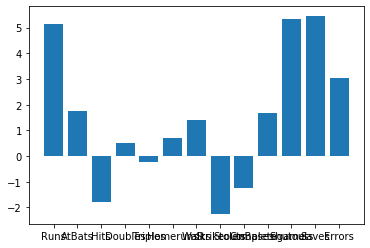

In [159]:
plt.bar(df1.columns,ls.coef_)
plt.show()

In [162]:
#try to minimize the coefficient variance
rd = Ridge(alpha = 0.001)
#rd = Ridge()
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.9024373006177768

In [154]:
rd.coef_

array([ 5.13175402,  1.75810031, -1.77296837,  0.51918232, -0.22755428,
        0.6989915 ,  1.39396743, -2.23838548, -1.24504723,  1.6735805 ,
        5.30313397,  5.44059517,  3.02934127])

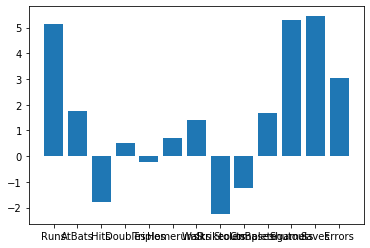

In [163]:
plt.bar(df1.columns,rd.coef_)
plt.show()

In [164]:
#ElasticNet is a combination of both Lasso and Ridge

In [83]:
from sklearn.linear_model import ElasticNet
enr = ElasticNet(alpha= 0.01)
#enr = ElasticNet()
enr.fit(x_train,y_train)
enrpred = enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.9027933546829027


array([ 4.96320066,  1.59890305, -1.56370658,  0.53501825, -0.29493275,
        0.63806766,  1.40728776, -2.08723472, -1.23904426,  1.59084818,
        5.15401159,  5.43893008,  2.87377154])

In [87]:
print('lm.score = 0.9030')
print('ls.score = 0.902437')
print('rd.score = 0.902437')
print('enr.score = 0.902793')
      

lm.score = 0.9030
ls.score = 0.902437
rd.score = 0.902437
enr.score = 0.902793


In [88]:
#linearRegression model has the best score, so we will save this model

In [89]:
from sklearn.externals import joblib
joblib.dump(lm,'lmbaseball.obj')
lm_from_joblib = joblib.load('lmbaseball.obj')
lm_from_joblib.predict(x_test) 


C:\Users\RIA MAITRA\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


array([[64.89777412],
       [98.83940938],
       [85.20223717],
       [68.75911279],
       [91.02393176],
       [95.19380923],
       [55.38047172],
       [90.51466895],
       [82.13353453],
       [87.41143892]])